In [1]:
import pandas as pd
import os

path = "/Applications/MAMP/htdocs/local/bootcamp_batch8/uber-traffic"

files = os.listdir(path)
files

['uber-raw-data-janjune-15.csv',
 'uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-sep14.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv']

In [2]:
files.remove("uber-raw-data-janjune-15.csv")
files

['uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-sep14.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv']

In [3]:
final = pd.DataFrame()

for file in files:
    df = pd.read_csv(path + "/" + file)
    final = pd.concat([df, final])

final.to_csv("uber.csv", index = False)

In [4]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4534327 entries, 0 to 564515
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Date/Time  object 
 1   Lat        float64
 2   Lon        float64
 3   Base       object 
dtypes: float64(2), object(2)
memory usage: 173.0+ MB


In [5]:
df = final.copy()
df

,Date/Time,Lat,Lon,Base
0,5/1/2014 0:02:00,40.7521,-73.9914,B02512
1,5/1/2014 0:06:00,40.6965,-73.9715,B02512
2,5/1/2014 0:15:00,40.7464,-73.9838,B02512
3,5/1/2014 0:17:00,40.7463,-74.0011,B02512
4,5/1/2014 0:17:00,40.7594,-73.9734,B02512
...,...,...,...,...
564511,4/30/2014 23:22:00,40.7640,-73.9744,B02764
564512,4/30/2014 23:26:00,40.7629,-73.9672,B02764
564513,4/30/2014 23:31:00,40.7443,-73.9889,B02764
564514,4/30/2014 23:32:00,40.6756,-73.9405,B02764


In [6]:
df["Date/Time"] = pd.to_datetime(df["Date/Time"])
df

,Date/Time,Lat,Lon,Base
0,2014-05-01 00:02:00,40.7521,-73.9914,B02512
1,2014-05-01 00:06:00,40.6965,-73.9715,B02512
2,2014-05-01 00:15:00,40.7464,-73.9838,B02512
3,2014-05-01 00:17:00,40.7463,-74.0011,B02512
4,2014-05-01 00:17:00,40.7594,-73.9734,B02512
...,...,...,...,...
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764


In [7]:
df["weekday"] = df["Date/Time"].dt.day_name()
df["day"] = df["Date/Time"].dt.day
df["minute"] = df["Date/Time"].dt.minute
df["month"] = df["Date/Time"].dt.month
df["hour"] = df["Date/Time"].dt.hour
df["year"] = df["Date/Time"].dt.year

df

,Date/Time,Lat,Lon,Base,weekday,day,minute,month,hour,year
0,2014-05-01 00:02:00,40.7521,-73.9914,B02512,Thursday,1,2,5,0,2014
1,2014-05-01 00:06:00,40.6965,-73.9715,B02512,Thursday,1,6,5,0,2014
2,2014-05-01 00:15:00,40.7464,-73.9838,B02512,Thursday,1,15,5,0,2014
3,2014-05-01 00:17:00,40.7463,-74.0011,B02512,Thursday,1,17,5,0,2014
4,2014-05-01 00:17:00,40.7594,-73.9734,B02512,Thursday,1,17,5,0,2014
...,...,...,...,...,...,...,...,...,...,...
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,Wednesday,30,22,4,23,2014
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,Wednesday,30,26,4,23,2014
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,Wednesday,30,31,4,23,2014
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,Wednesday,30,32,4,23,2014


In [8]:
df["Base"].unique()

array(['B02512', 'B02598', 'B02617', 'B02682', 'B02764'], dtype=object)

In [9]:
import plotly.express as px 

counts = df["weekday"].value_counts()

px.bar(x = counts.index, y = counts.values)

<Axes: xlabel='weekday'>

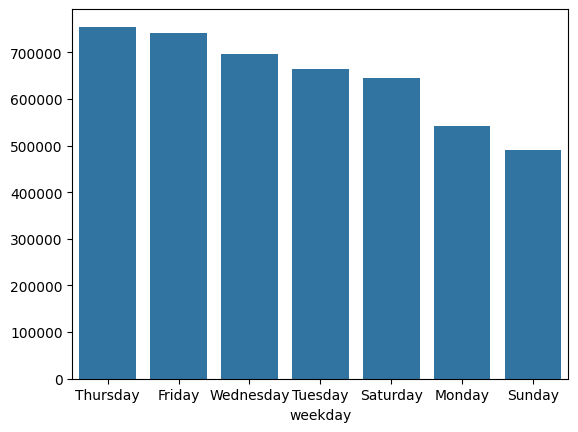

In [10]:
import seaborn as sns

counts = df["weekday"].value_counts()
sns.barplot(x = counts.index, y = counts.values)

<Axes: xlabel='hour', ylabel='Lat'>

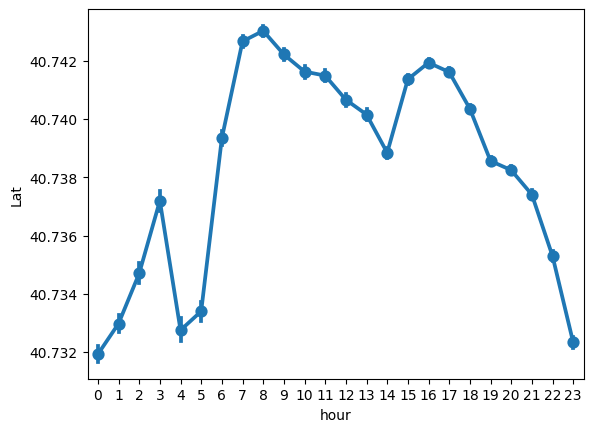

In [11]:
sns.pointplot(x = "hour", y = "Lat", data = df)

<Axes: xlabel='hour', ylabel='Lat'>

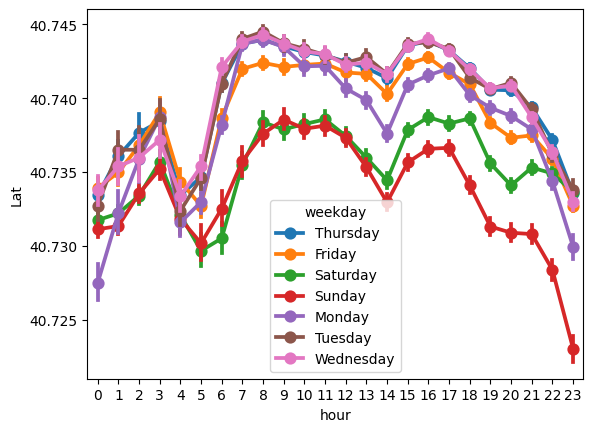

In [12]:
sns.pointplot(x = "hour", y = "Lat", hue = "weekday", data = df)

In [13]:
test = [100,200,300,400]

for i,angka in enumerate(test, 1):
    print(f"{i} = {angka}")

1 = 100
2 = 200
3 = 300
4 = 400


Assignment

<Axes: ylabel='Base'>

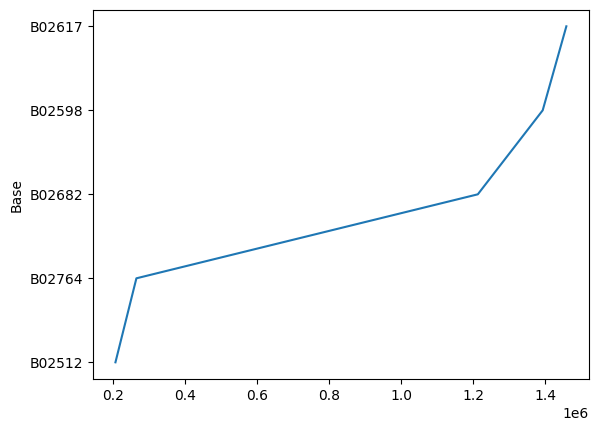

In [14]:
data = df["Base"].value_counts()
sns.lineplot(y = data.index, x = data.values)

<Axes: xlabel='Base', ylabel='count'>

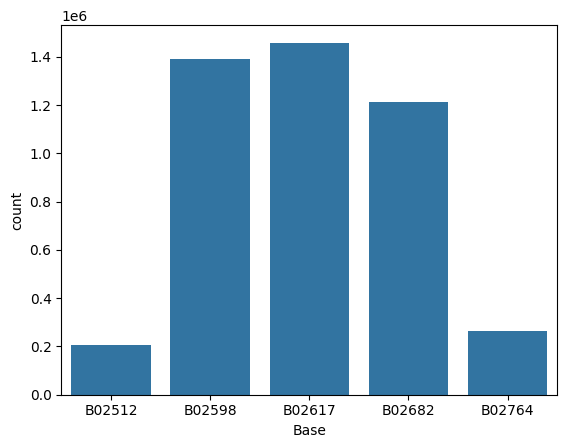

In [15]:
sns.countplot(x = "Base", data = df)